In [6]:
import warnings; warnings.filterwarnings(action='ignore')
from matplotlib import pyplot as plt
%matplotlib inline
import geopandas as gpd

from shapely.geometry import LineString, mapping

def point_to_linestring(points):
    gdf = gpd.read_file(fili_shps) #POINTS
    latlon = [mapping(x)['coordinates'] for x in gdf.geometry]
    lats = [x[1] for x in latlon]
    lons = [x[0] for x in latlon]
    linestr = LineString(zip(lons, lats))
    return gpd.GeoDataFrame(index=[0], crs=gdf.crs, geometry=[linestr])

In [17]:
field = [(-114.31092,51.172859),(-114.31092,51.170787),(-114.304461,51.170787),(-114.304461,51.172859)]
gpd.GeoDataFrame(LineString(field))

ValueError: DataFrame constructor not properly called!

In [2]:
import pandas as pd
from shapely.geometry import Point
import pkg_resources
from geopandas import GeoDataFrame

df = pd.DataFrame({#'zip':[19152,19047],
               'Lat':[40.058841,40.202162],
               'Lon':[-75.042164,-74.924594]})

geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]



gdf = GeoDataFrame(df, geometry=geometry)

gdf.to_json()

,Lat,Lon,geometry
0,40.058841,-75.042164,POINT (-75.04216 40.05884)
1,40.202162,-74.924594,POINT (-74.92459 40.20216)


In [3]:
gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Lat": 40.058841, "Lon": -75.042164}, "geometry": {"type": "Point", "coordinates": [-75.042164, 40.058841]}}, {"id": "1", "type": "Feature", "properties": {"Lat": 40.202162, "Lon": -74.924594}, "geometry": {"type": "Point", "coordinates": [-74.924594, 40.202162]}}]}'

In [28]:
df

,Lat,Lon,geometry
0,40.058841,-75.042164,POINT (-75.04216 40.05884)
1,40.202162,-74.924594,POINT (-74.92459 40.20216)



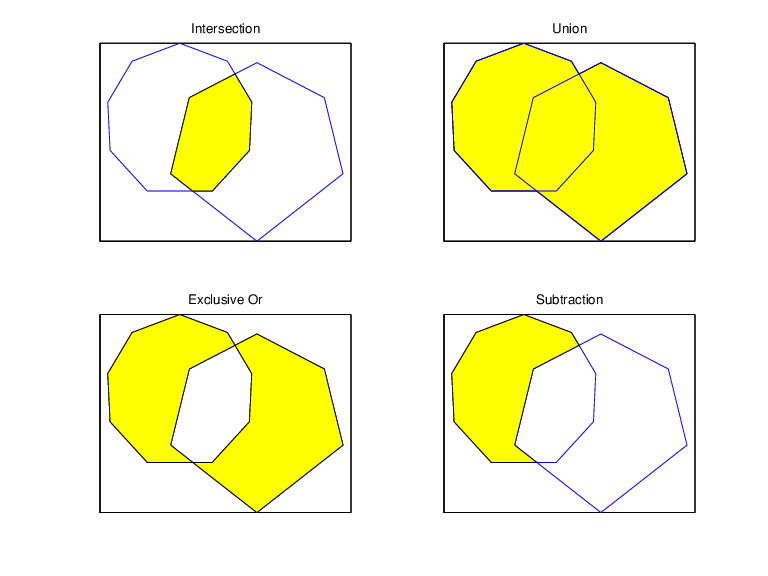!
# For making a GeoDataFrame of linestrings
https://gis.stackexchange.com/questions/367005/how-can-i-convert-a-linestring-geodataframe-to-a-points-geodataframe-while-retai

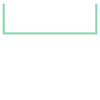

In [33]:
line = [(-114.31092,51.172859),(-114.31092,51.170787),(-114.304461,51.170787),(-114.304461,51.172859)]

geo2 = LineString(line)
geo2

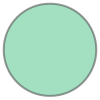

In [23]:
geo2.buffer(0.5)

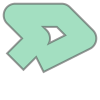

In [29]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line2 = line.buffer(0.5, cap_style = 2)



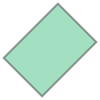

In [44]:
line = LineString([(2, 1), (1, 0)])
line3 = line.buffer(0.5, cap_style = 2)
line3

In [51]:
line3.area

1.4142135623730951

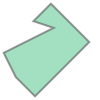

In [49]:
from osgeo import ogr

intersection = line3.intersection(line2)
intersection

In [50]:
intersection.area

1.2196038887550529

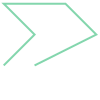

In [30]:
line

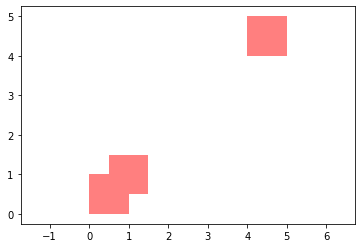

In [31]:
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt

r1 = sg.Polygon([(0,0),(0,1),(1,1),(1,0),(0,0)])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

,myid,myorder,lat,long,geometry
0,1,1,36.42,-118.11,POINT (-118.11000 36.42000)
1,1,2,36.40,-118.12,POINT (-118.12000 36.40000)
2,1,3,36.32,-118.07,POINT (-118.07000 36.32000)
3,2,1,36.28,-117.95,POINT (-117.95000 36.28000)
4,2,2,36.17,-117.95,POINT (-117.95000 36.17000)


,geometry
myid,
1,"LINESTRING (-118.11000 36.42000, -118.12000 36..."
2,"LINESTRING (-117.95000 36.28000, -117.95000 36..."


C:\Users\Jan Erik Naess\AppData\Local\Temp\ipykernel_15600\2592663133.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


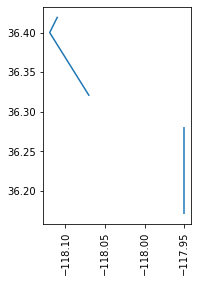

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import pyproj
from pyproj import CRS

myid = [1, 1, 1, 2, 2]
myorder = [1, 2, 3, 1, 2]
lat = [36.42, 36.4, 36.32, 36.28, 36.17]
long = [-118.11, -118.12, -118.07, -117.95, -117.95]
df = pd.DataFrame(list(zip(myid, myorder, lat, long)), columns =['myid', 'myorder', 'lat', 'long']) 
gdf_pt = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))
display(gdf_pt)
gdf_line = gdf_pt.sort_values(by=['myorder']).groupby(['myid'])['geometry'].apply(lambda x: LineString(x.tolist()))
gdf_line = gpd.GeoDataFrame(gdf_line, geometry='geometry')
#gdf_line.crs = "EPSG:4326"
display(gdf_line)
ax = gdf_line.plot();
ax.set_aspect('equal')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<AxesSubplot:>

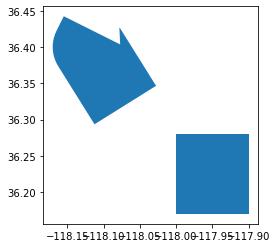

In [16]:
gdf_line.buffer(.05,cap_style=2)

In [12]:
import numpy as np
a = np.empty((0))
b = np.ones((5))
np.concatenate((a,b))

array([1., 1., 1., 1., 1.])

In [4]:
[1,2]+[3,4]

[1, 2, 3, 4]

In [13]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


<class 'list'>


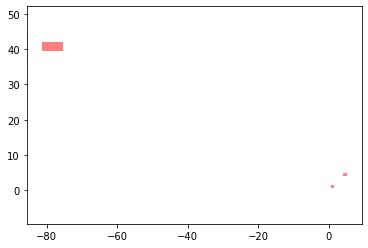

In [11]:
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt
import json

test = '[[39.35129, -81.320801], [42.098222, -81.320801], [42.098222, -75.52002], [39.35129, -75.52002]]'
res = json.loads(test)
print(type(res))

coords = []

for point in res:
    coords.append((point[1],point[0]))

tuple(coords)

r1 = sg.Polygon(coords)
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [12]:
import geopandas as gpd

#gdf = gpd.GeoDataFrame(r1, geometry='geometry')
#gdf

print(r1)

POLYGON ((-81.320801 39.35129, -81.320801 42.098222, -75.52002 42.098222, -75.52002 39.35129, -81.320801 39.35129))


In [14]:
tuple(coords)

((-81.320801, 39.35129),
 (-81.320801, 42.098222),
 (-75.52002, 42.098222),
 (-75.52002, 39.35129))

In [19]:
test2 = '-75.143738,40.00857,-75.143738,40.155749,-74.590302,40.155749,-74.590302,40.00857,-75.143738,40.00857'
res = test2.split(',')

coords = []
for i in range(0,len(res),2):
    coords.append((res[i+1],res[i]))
    
coords

[('40.00857', '-75.143738'),
 ('40.155749', '-75.143738'),
 ('40.155749', '-74.590302'),
 ('40.00857', '-74.590302'),
 ('40.00857', '-75.143738')]